In [1]:
import numpy, math

In [2]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

# MQ135

calibrate MQ135 for CO2
convert sensor output to gas reading
http://davidegironi.blogspot.co.uk/2014/01/cheap-co2-meter-using-mq135-sensor-with.html


ppm = a*(Rs/Ro)^b
using the datasheet graph the values 
ppm = 116.6020682 (Rs/Ro)^-2.769034857
notes that the datasheet graph is basic
assuming that the value initially shown by the sensor
1450 = 116.6020682*((50308/Ro)**-2.769034857)
Ro = 19877551 *exp(ln(116.6020682/1450)/-2.769034857)

#using python syntax
Ro =19877551*(math.exp(numpy.log(116.6020682/1450)/-2.769034857))
Ro = 49395270.0633941
ppm = 116.6020682 (Rs/49395270.0633941)**-2.769034857


In [16]:
Ro =19877551*(math.exp(numpy.log(116.6020682/1450)/-2.769034857))

In [17]:
Ro

49395270.0633941

second reading
1616 on sams sensor
15238095 (though this changes)

Ro =15238095*(math.exp(numpy.log(116.6020682/1616)/-2.769034857))



In [6]:
Ro =15238095*(math.exp(numpy.log(116.6020682/1616)/-2.769034857))

t = 24.6 C
RH = 43.3

In [7]:
Ro

39377947.764894806

In [18]:
Ro =16338983.0508*(math.exp(numpy.log(116.6020682/1806)/-2.769034857))

t = 24.5 
RH = 44.2

In [19]:
Ro

43952319.39951422

In [5]:
Ro =14738461.53*(math.exp(numpy.log(116.6020682/1903)/-2.769034857))
t = 24.3
RH = 45.9

In [6]:
Ro

40403066.59595728

# MQ135 Temperature and RH adjustment


In [8]:
t_c = [-10,0, 5,10,20,30,40,50]

# 33 RH
rs_ro = [1.7,1.4,1.25,1.1,1,0.95,0.925,0.9] 
# 85 RH
rs_ro_85 = [1.55,1.25,1.15,1.05,0.9,0.85,0.82,0.8]
# in between

In [26]:


def rs_ro_at_varying_RH(new_rh):
    # assuming that 33< rh <85 
    # 33 RH
    rs_ro = [1.7,1.4,1.25,1.1,1,0.95,0.925,0.9] 
    # 85 RH
    rs_ro_85 = [1.55,1.25,1.15,1.05,0.9,0.85,0.82,0.8]
    # in between
    new_diff = new_rh -33
    rh_diff = 85 - 33
    rs_ro_new = []
    for rs in range(0,len(rs_ro)):
        diff = (  rs_ro[rs] - rs_ro_85[rs]) / rh_diff#
        nw_rso = rs_ro[rs] - (diff * new_diff) 
        rs_ro_new.append(nw_rso)
    return rs_ro_new

In [10]:
coefs = poly.polyfit(t_c,rs_ro,3)
coefs2 = poly.polyfit(t_c,rs_ro_85,3)
t_new=[]
for i in t_c:
    t_new.append(i+0.1)

In [11]:
ffit = poly.polyval(t_new,coefs)
ffit2 = poly.polyval(t_new,coefs2)

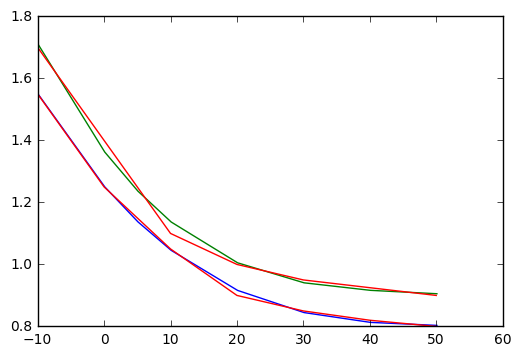

In [12]:
plt.plot(t_new,ffit, color = 'green', label = '33')
plt.plot(t_new,ffit2, color = 'blue', label = '85')
plt.plot(t_c, rs_ro, color='red')
plt.plot(t_c, rs_ro_85, color='red')
plt
plt.show()

In [13]:
ffit

array([ 1.7089461 ,  1.36245907,  1.23622589,  1.13685196,  1.00523888,
        0.94073392,  0.91645118,  0.90550475])

In [14]:
it = poly.polyval(24.6,coefs)

In [15]:
it

0.96951512683301233

In [28]:
new_rs = rs_ro_at_varying_RH(75)

[1.5788461538461538,
 1.2788461538461537,
 1.169230769230769,
 1.0596153846153846,
 0.9192307692307693,
 0.8692307692307693,
 0.8401923076923077,
 0.8192307692307692]

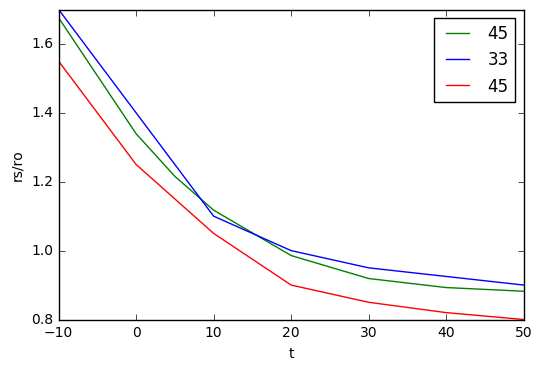

0.95255232830140435

In [31]:
# mq135 temperature correction factor
# import function and modules as above
current_RH = 45
temperature = 24
new_rs = rs_ro_at_varying_RH(current_RH)
t_c = [-10,0, 5,10,20,30,40,50]
coefs = poly.polyfit(t_c,new_rs,3)
ffit = poly.polyval(t_c,coefs)
# 33 RH - for reference
rs_ro = [1.7,1.4,1.25,1.1,1,0.95,0.925,0.9] 
# 85 RH
rs_ro_85 = [1.55,1.25,1.15,1.05,0.9,0.85,0.82,0.8]
plt.plot(t_c,ffit, color = 'green', label = current_RH)
plt.plot(t_c, rs_ro, color='blue', label = '33')
plt.plot(t_c, rs_ro_85, color='red', label = '45')
plt.legend()
plt.xlabel('t')
plt.ylabel('rs/ro')
plt.show()
poly.polyval(temperature,coefs)

# Lux

In [35]:
(0.1/42403066)**-2.76

6.480618216460208e+23